In [126]:
import glob
import os
import os.path as osp
from typing import Tuple, Any

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
from notebook_lib import *

In [128]:
ds_results_dir = '/Users/jpgard/Documents/github/tablebench/domain_shift_results'

In [131]:
all_results = read_domain_shift_results(ds_results_dir)
all_results.drop(columns='index', inplace=True)

no results for shift heloc_avgminfile matching /Users/jpgard/Documents/github/tablebench/domain_shift_results/heloc_avgminfile/20230119163244/*_full.csv
no results for shift adult matching /Users/jpgard/Documents/github/tablebench/domain_shift_results/adult/20230113105804/*_full.csv


In [132]:
tasks_to_skip = ['_debug']
tasks = [x for x in sorted(all_results['task'].unique()) if x not in tasks_to_skip]
estimators = ('lightgbm', 'xgb')
print(tasks)
print(estimators)

['acsfoodstamps_region', 'acsincome_region', 'acspubcov_disability', 'acspubcov_year', 'acsunemployment_edlvl', 'acsunemployment_mobility', 'acsunemployment_year', 'anes_region', 'anes_year', 'brfss_blood_pressure_bmi', 'brfss_blood_pressure_income', 'brfss_diabetes_race', 'diabetes_admsrc', 'diabetes_admtype', 'heloc_burden', 'heloc_externalrisk', 'mimic_extract_hosp_mort', 'mimic_extract_los_3_ins', 'mimic_extract_mort_hosp_ins', 'mooc_course', 'nhanes_cholesterol_race', 'nhanes_lead_poverty', 'physionet_los31', 'physionet_los38', 'physionet_los47', 'physionet_set', 'physionet_unit1', 'physionet_unit2']
('lightgbm', 'xgb')


In [133]:
pd.options.display.max_rows=100

In [134]:
all_results

,train-auc,train-map,validation-auc,validation-map,id_test_2-auc,id_test_2-map,id_test_3-auc,id_test_3-map,id_test_4-auc,id_test_4-map,...,id_test_75-auc,id_test_75-map,id_test_72_accuracy,id_test_73_accuracy,id_test_74_accuracy,id_test_75_accuracy,id_test_72-average_precision,id_test_73-average_precision,id_test_74-average_precision,id_test_75-average_precision
0,0.701755,0.756890,0.697437,0.749190,0.686486,0.688908,0.677991,0.788700,0.684930,0.706601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.683370,0.738031,0.684158,0.737292,0.668590,0.671013,0.657242,0.774025,0.664984,0.693698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.686323,0.740211,0.685179,0.737893,0.670697,0.670865,0.663125,0.778509,0.652041,0.680935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.683646,0.740905,0.684576,0.739407,0.669660,0.674480,0.660497,0.777960,0.656338,0.690011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.684952,0.737829,0.684786,0.736727,0.671560,0.672139,0.663270,0.776327,0.673214,0.701052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18792,0.657880,NaN,0.652827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18793,0.677534,NaN,0.670215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18794,0.679709,NaN,0.672514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18795,0.667898,NaN,0.661259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
metric = 'validation_accuracy'
df = best_results_by_metric(all_results, metric=metric)
df['delta_acc_test'] = df['ood_test_accuracy'] - df['id_test_accuracy']

In [136]:
df[group_cols + [metric, 'delta_acc_test']].sort_values(by=['estimator', 'task', 'domain_split_ood_values'])

,task,estimator,domain_split_ood_values,validation_accuracy,delta_acc_test
967,acsfoodstamps_region,lightgbm,['00'],0.850092,-0.118218
1125,acsfoodstamps_region,lightgbm,['01'],0.844625,0.013438
1361,acsfoodstamps_region,lightgbm,['02'],0.845979,0.003626
1542,acsfoodstamps_region,lightgbm,['03'],0.845667,-0.004010
1720,acsfoodstamps_region,lightgbm,['04'],0.840656,0.021753
...,...,...,...,...,...
10197,physionet_set,xgb,['b'],0.978461,0.007241
3796,physionet_unit1,xgb,[0],0.979793,0.007034
3996,physionet_unit1,xgb,[1],0.983212,-0.002125
15797,physionet_unit2,xgb,[0],0.983212,-0.002122


In [137]:
# Sanity check that there is one best result per model
np.all(df.groupby(group_cols).size().values==1)

True

/var/folders/3f/96kfmy7s1y5_5fr8cgqtfzpm0000gn/T/ipykernel_28054/453378740.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))


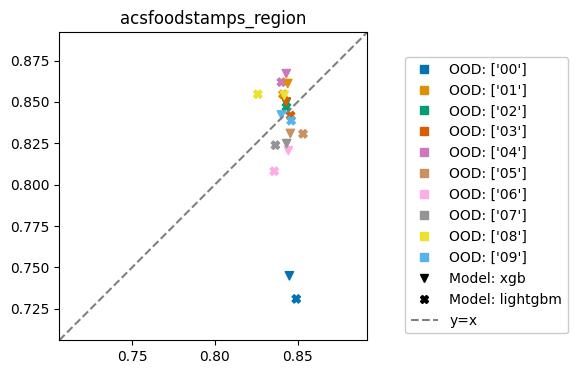

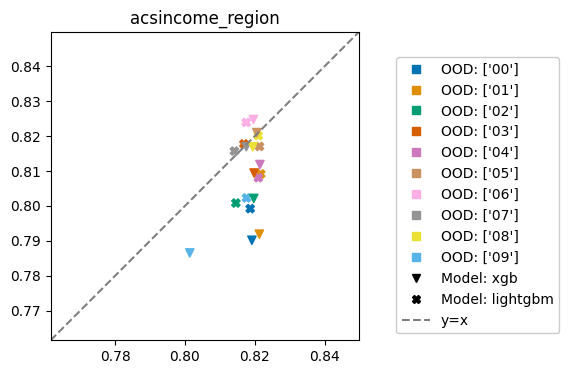

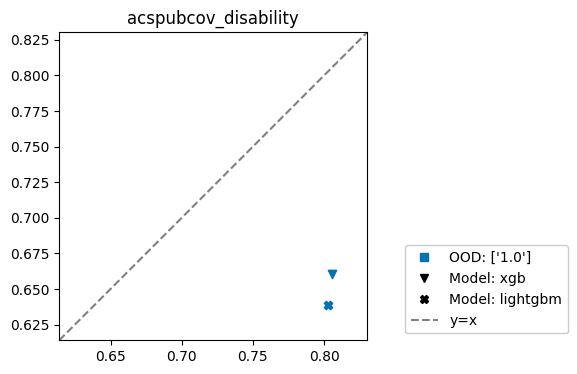

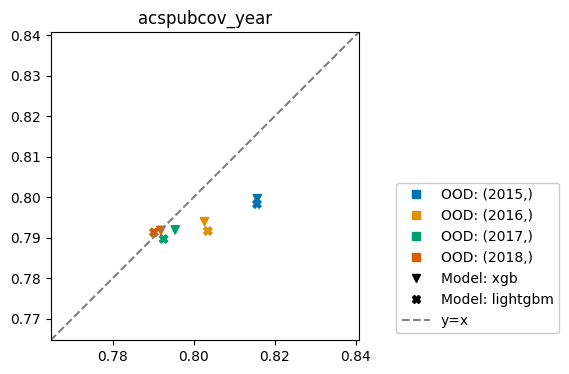

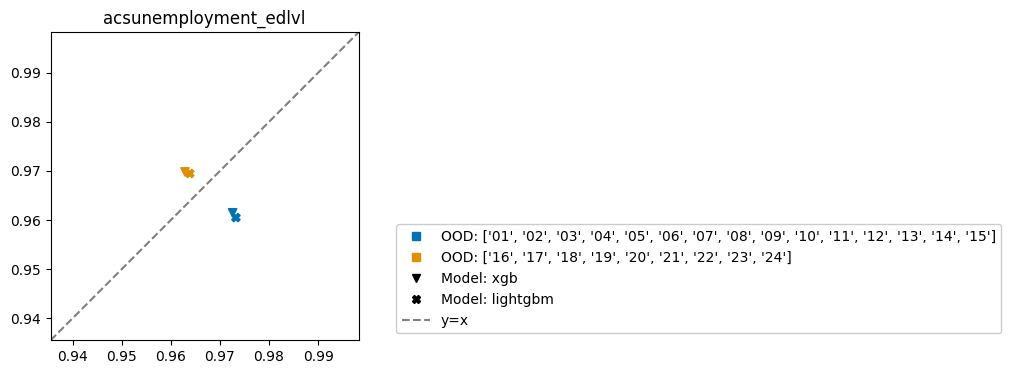

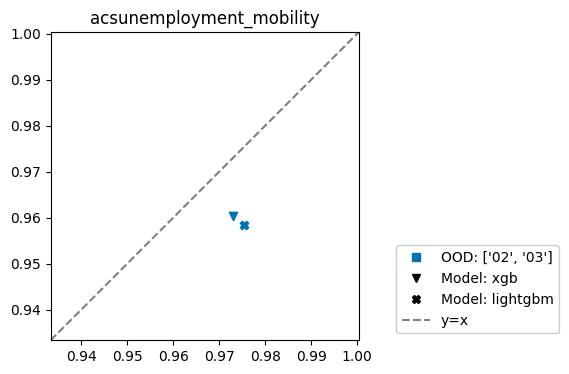

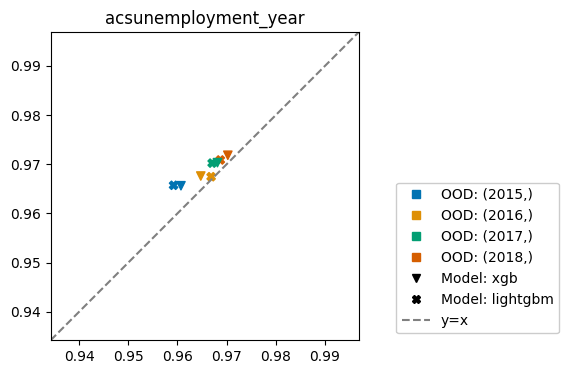

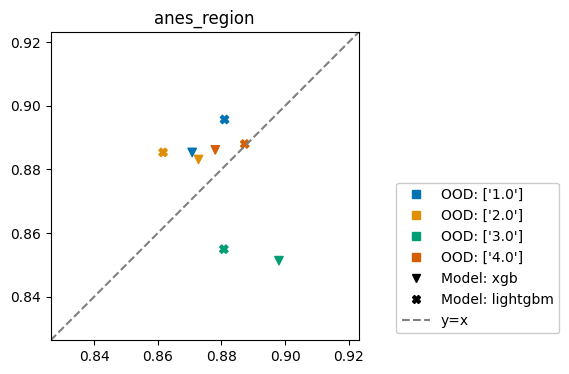

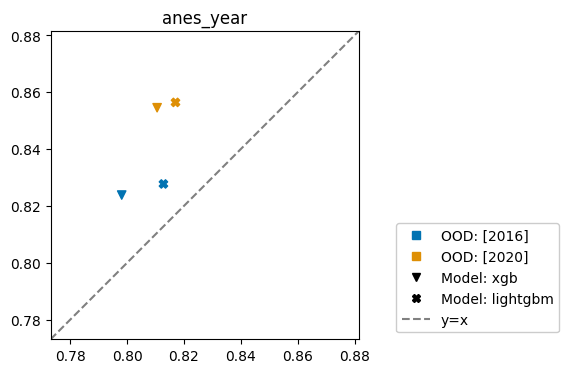

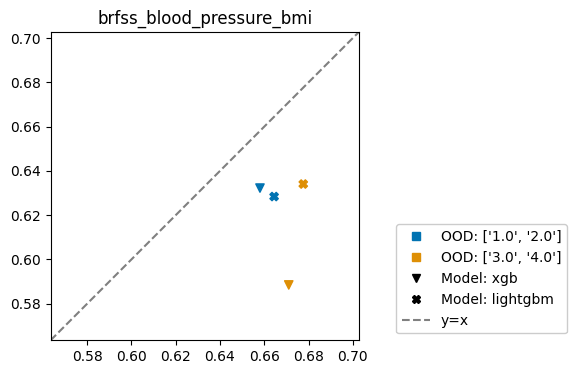

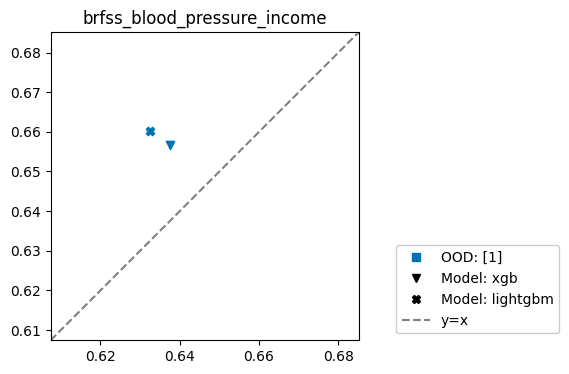

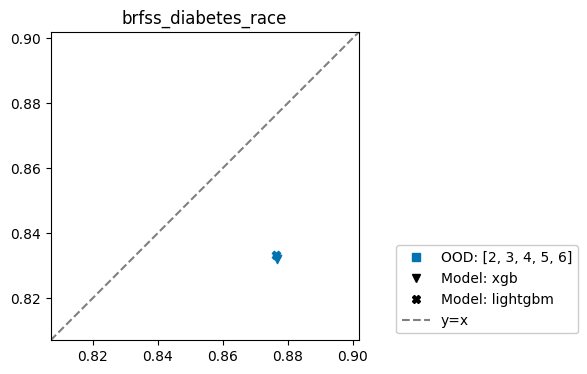

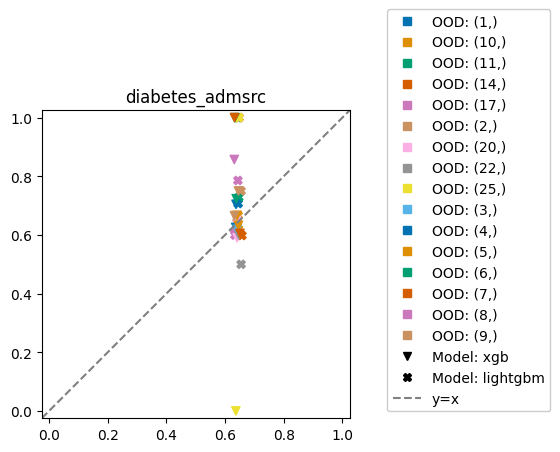

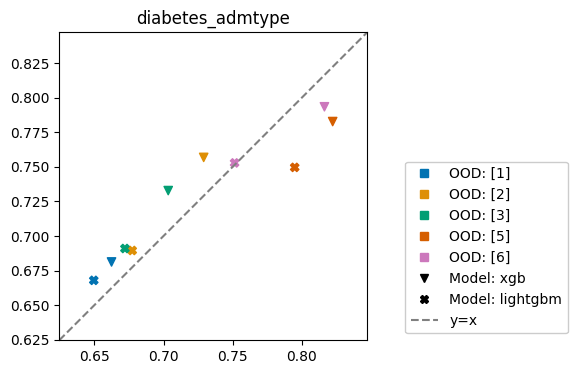

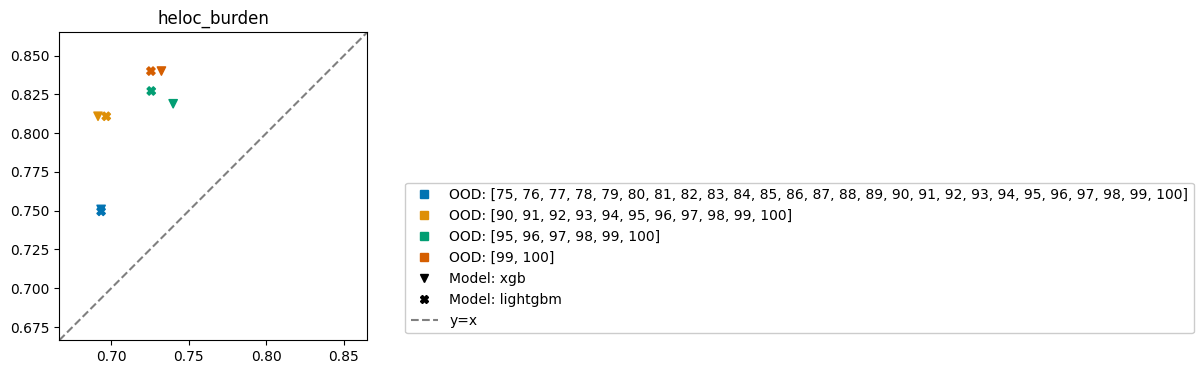

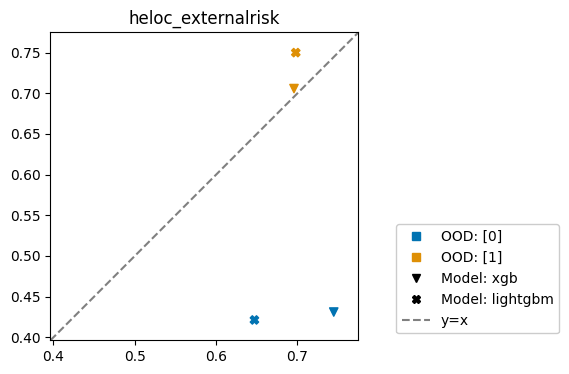

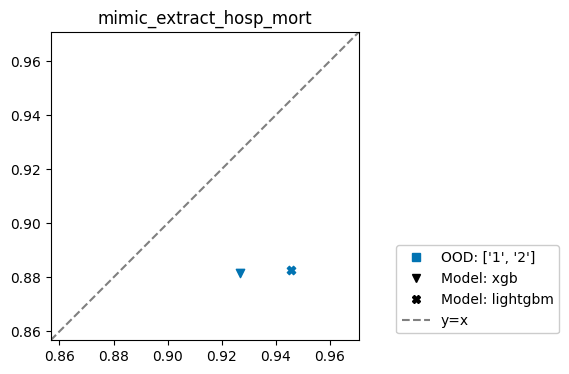

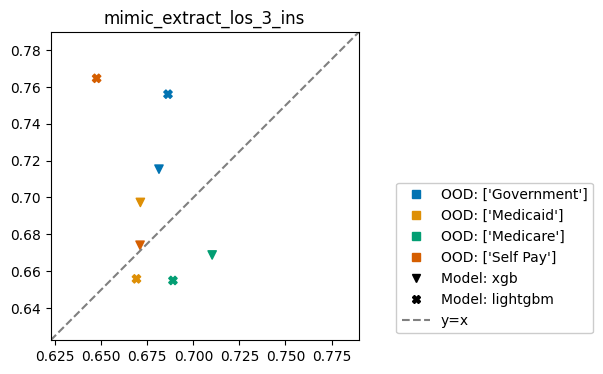

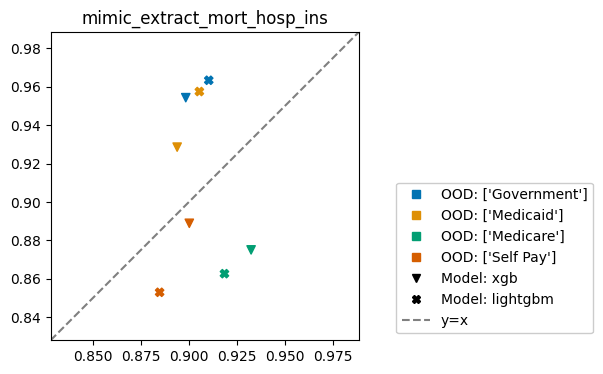

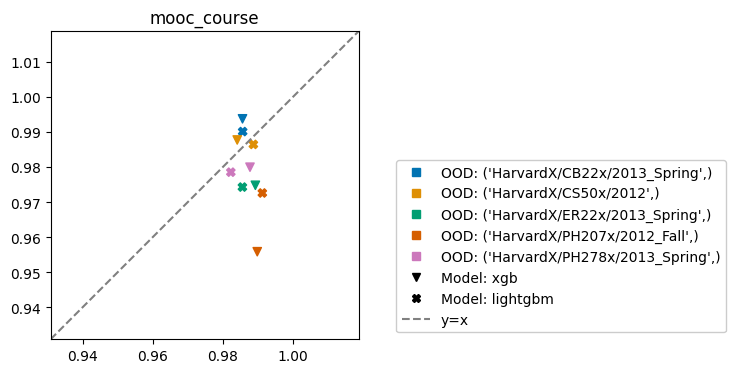

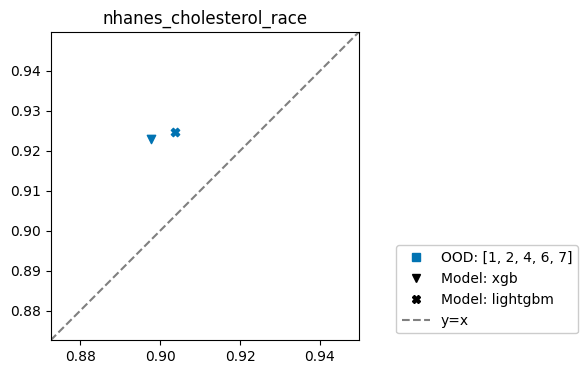

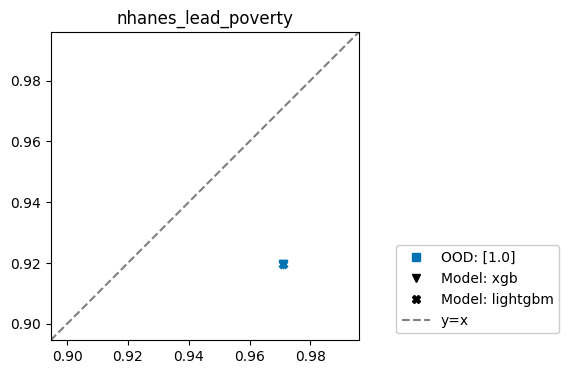

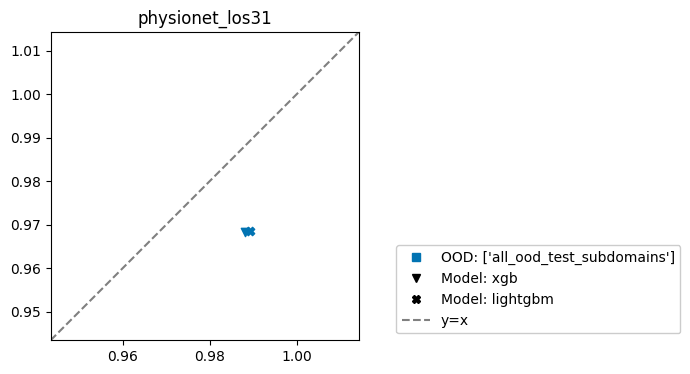

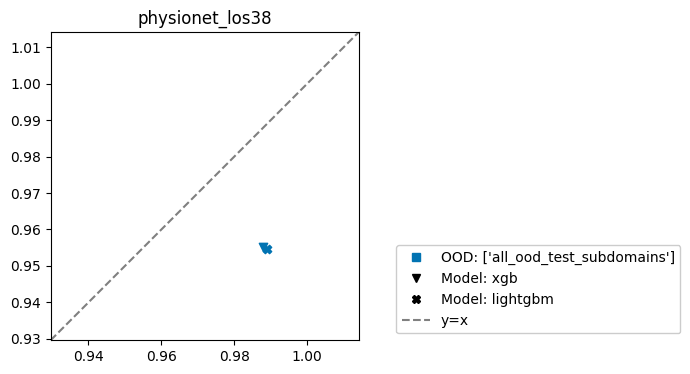

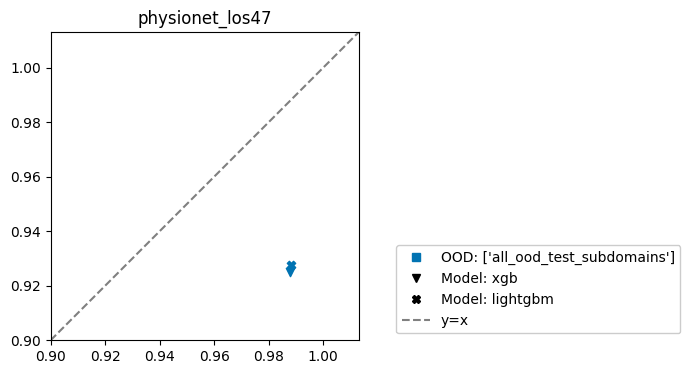

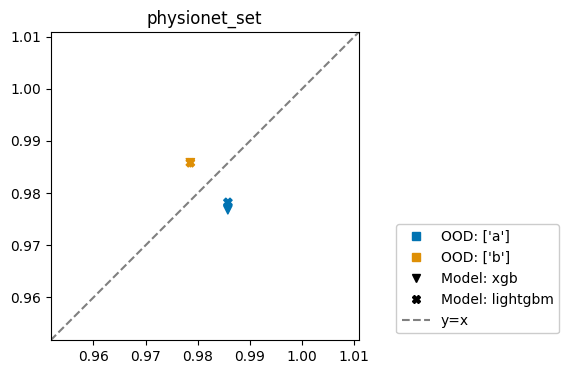

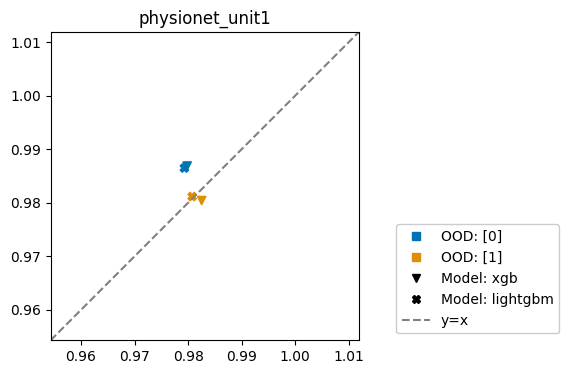

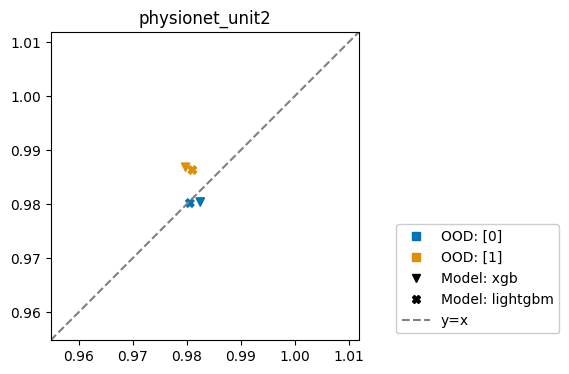

In [138]:
xval = 'id_test_accuracy'
yval = 'ood_test_accuracy'
ood_colname = 'domain_split_ood_values'

axpad = 0.025 # axis margin padding, in data coordinates

estimator_markers = {
    'xgb': 'v',
    'lightgbm': 'X'
}

for task in tasks:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))
    ax.set_title(task)
    task_df = df.query(f"task == '{task}'")
    _, domain_cmap = values_to_colors(task_df[ood_colname])
    
    if not len(task_df):
        print(f"no results for task {task}, skipping")
        continue
    for estimator in estimators:
        df_ = task_df.query(f"estimator == '{estimator}'")
        assert len(df_) == len(domain_cmap)  # check exactly one result per domain
        ax.scatter(df_[xval], df_[yval], label=df_['domain_split_ood_values'],
               color=df_['domain_split_ood_values'].map(domain_cmap),
               marker=estimator_markers[estimator])
    
    xymin = task_df[[xval, yval]].values.min() - axpad
    xymax = task_df[[xval, yval]].values.max() + axpad
    
    ax.set(xlim=(xymin, xymax), ylim=(xymin, xymax))
    ax.set_aspect('equal')
    
    ax.axline((xymin, xymin), slope=1, color="grey", linestyle='--')

    # Label using proxy artists; see https://stackoverflow.com/a/45141109/5843188
    def _proxy_artist(m, c, ls="none"):
        return plt.plot([],[],marker=m, color=c, ls=ls)[0]

    handles = [_proxy_artist("s", c) for c in domain_cmap.values()]
    handles += [_proxy_artist(m, "k") for m in estimator_markers.values()]
    handles.append(_proxy_artist(None, 'grey', '--'))

    labels = [f'OOD: {k}' for k in domain_cmap.keys()] \
                + [f'Model: {e}' for e in estimator_markers.keys()] \
                + ['y=x']

    ax.legend(handles, labels, loc=3, framealpha=1,
             bbox_to_anchor=(1.1, 0))


In [148]:
# for task in tasks:
#     print(task)
#     print(df.query(f"task == '{task}'")[ood_colname].unique())

In [145]:
# # tasks and ood values used in benchmark
task_and_ood = [(x.taskname_full, x.ood_vals) for x in EXPERIMENTS_LIST]

In [146]:
estimators

('lightgbm', 'xgb')

In [147]:
# delta_acc numbers for Table 1
for task,ood in tasks_and_ood:
    df_ = df[(df['task'] == task) & (df[ood_colname] == ood)]
    assert len(df_) == len(estimators), f"{task} / {ood} / {len(df_)}"
    # since it is negative, we want the 'largest' -- this is the BEST baseline gap.
    tmp = df_[['task', 'estimator', 'delta_acc_test', metric]].nlargest(1, columns=metric).set_index(['task','estimator'])
    print(tmp * 100)

                                delta_acc_test  validation_accuracy
task                 estimator                                     
acsfoodstamps_region xgb             -2.392745            84.629962
                            delta_acc_test  validation_accuracy
task             estimator                                     
acsincome_region lightgbm        -1.254151            82.189145
                                delta_acc_test  validation_accuracy
task                 estimator                                     
acspubcov_disability xgb            -14.455649            80.674187
                                 delta_acc_test  validation_accuracy
task                  estimator                                     
acsunemployment_edlvl lightgbm        -1.275219            97.699492
                       delta_acc_test  validation_accuracy
task        estimator                                     
anes_region lightgbm        -2.579088            91.153846
                

In [ ]:
# Ignore everything below this line

In [68]:
df['task'] = df['task'].replace({'diabetes_admsrc': 'diabetes_readmission_admsrc',
                    'diabetes_admtype': 'diabetes_readmission_admtype'})

In [69]:

df['task'].apply(lambda x: x.rsplit("_", maxsplit=1)[0]).unique()

array(['', 'acsfoodstamps', 'acsincome', 'acspubcov', 'acsunemployment',
       'anes', 'brfss_blood_pressure', 'brfss_diabetes',
       'diabetes_readmission', 'heloc', 'mimic_extract_los_3',
       'mimic_extract_mort_hosp', 'mooc', 'nhanes_cholesterol',
       'nhanes_lead', 'physionet'], dtype=object)

In [78]:
df['uid'] = df['task'].apply(lambda x: x.rsplit("_", maxsplit=1)[0]) + "domain_split_varname_" + df['domain_split_varname'] + 'domain_split_ood_value_' + \
    df[ood_colname].apply(lambda x: re.sub("[\\[\\]\\',\s\\(\\)]", '', x))

In [80]:
from pprint import pprint

overlap = set(df['uid'].unique()).intersection(set(UIDS_LIST))
print(len(overlap))
pprint(overlap)

10
{'acsfoodstampsdomain_split_varname_DIVISIONdomain_split_ood_value_06',
 'acsincomedomain_split_varname_DIVISIONdomain_split_ood_value_01',
 'acspubcovdomain_split_varname_DISdomain_split_ood_value_1.0',
 'acsunemploymentdomain_split_varname_SCHLdomain_split_ood_value_010203040506070809101112131415',
 'anesdomain_split_varname_VCF0112domain_split_ood_value_3.0',
 'brfss_blood_pressuredomain_split_varname_BMI5CATdomain_split_ood_value_3.04.0',
 'diabetes_readmissiondomain_split_varname_admission_source_iddomain_split_ood_value_7',
 'helocdomain_split_varname_ExternalRiskEstimateLowdomain_split_ood_value_0',
 'mimic_extract_los_3domain_split_varname_insurancedomain_split_ood_value_Medicare',
 'nhanes_leaddomain_split_varname_INDFMPIRBelowCutoffdomain_split_ood_value_1.0'}


In [81]:
missed = set(UIDS_LIST) - set(df['uid'].unique())
print(len(missed))
pprint(missed)

3
{'brfss_diabetesdomain_split_varname_PRACE1domain_split_ood_value_23456domain_split_id_values_1',
 'mimic_extract_mort_hospdomain_split_varname_insurancedomain_split_ood_value_MedicareMedicaid',
 'physionetICULOSgt47.0'}


In [77]:
set(df['uid'].unique()) - set(UIDS_LIST)

{'acsfoodstampsdomain_split_varname_DIVISIONdomain_split_ood_value_00',
 'acsfoodstampsdomain_split_varname_DIVISIONdomain_split_ood_value_01',
 'acsfoodstampsdomain_split_varname_DIVISIONdomain_split_ood_value_02',
 'acsfoodstampsdomain_split_varname_DIVISIONdomain_split_ood_value_03',
 'acsfoodstampsdomain_split_varname_DIVISIONdomain_split_ood_value_04',
 'acsfoodstampsdomain_split_varname_DIVISIONdomain_split_ood_value_05',
 'acsfoodstampsdomain_split_varname_DIVISIONdomain_split_ood_value_07',
 'acsfoodstampsdomain_split_varname_DIVISIONdomain_split_ood_value_08',
 'acsfoodstampsdomain_split_varname_DIVISIONdomain_split_ood_value_09',
 'acsincomedomain_split_varname_DIVISIONdomain_split_ood_value_00',
 'acsincomedomain_split_varname_DIVISIONdomain_split_ood_value_02',
 'acsincomedomain_split_varname_DIVISIONdomain_split_ood_value_03',
 'acsincomedomain_split_varname_DIVISIONdomain_split_ood_value_04',
 'acsincomedomain_split_varname_DIVISIONdomain_split_ood_value_05',
 'acsincomed

In [ ]:
df.set_index(group_cols)[[xval, yval]]

In [ ]:
filename = "tune_results_physionet_setdomain_split_varname_setdomain_split_ood_value_a_lightgbm.csv"

import re
def extract_uid_from_filename(filename:str)->str:
    return re.search("^tune_results_(.*)_\w+\\.csv", filename).group(1)

extract_uid_from_filename(filename)